<a href="https://colab.research.google.com/github/amien1410/kaggle-projects/blob/main/Uber_Pickups_Data_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install Kaggle Modules to download the dataset
!pip install kaggle

# Load Kaggle user authorization key
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

# Download the dataset, get the user and dataset name from the url "https://www.kaggle.com/datasets/shivamb/netflix-shows"
!kaggle datasets download -d fivethirtyeight/uber-pickups-in-new-york-city

# Unzip the dataset
!unzip -q "/content/uber-pickups-in-new-york-city"

Dataset URL: https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city
License(s): CC0-1.0
 89% 97.0M/109M [00:01<00:00, 96.4MB/s]
100% 109M/109M [00:01<00:00, 86.9MB/s] 


In [2]:
# Loading modules
import pandas as pd
import numpy as np

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib import cm #Colormap

In [3]:
# Load the datasets
df_apr14 = pd.read_csv("/content/uber-raw-data-apr14.csv")
df_may14 = pd.read_csv("/content/uber-raw-data-may14.csv")
df_jun14 = pd.read_csv("/content/uber-raw-data-jun14.csv")
df_jul14 = pd.read_csv("/content/uber-raw-data-jul14.csv")
df_aug14 = pd.read_csv("/content/uber-raw-data-aug14.csv")
df_sep14 = pd.read_csv("/content/uber-raw-data-sep14.csv")

In [4]:
# Merge the dataframes into one
df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

In [5]:
print(df.head())
print(df.info())

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB
None


In [6]:
# Renaming the Date/Time Column
df = df.rename(columns={'Date/Time': 'Date_time'})

# Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

# Adding useful columns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

print(df.head())
print(df.info())

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [7]:
df.describe(include = 'all')

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,NaN,NaN,NaN,5,6,7,NaN,NaN,NaN
top,NaN,NaN,NaN,B02617,September,Thursday,NaN,NaN,NaN
freq,NaN,NaN,NaN,1458853,1028136,755145,NaN,NaN,NaN
mean,2014-07-11 18:50:50.578151424,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
min,2014-04-01 00:00:00,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2014-05-28 15:18:00,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01
50%,2014-07-17 14:45:00,4.074220e+01,-7.398340e+01,NaN,NaN,NaN,1.600000e+01,1.500000e+01,2.900000e+01
75%,2014-08-27 21:55:00,4.076100e+01,-7.396530e+01,NaN,NaN,NaN,2.300000e+01,1.900000e+01,4.400000e+01
max,2014-09-30 22:59:00,4.211660e+01,-7.206660e+01,NaN,NaN,NaN,3.100000e+01,2.300000e+01,5.900000e+01


In [8]:
#@title Trips by Hour

#Grouping by Hour
df_hour_grouped = df.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index)

df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


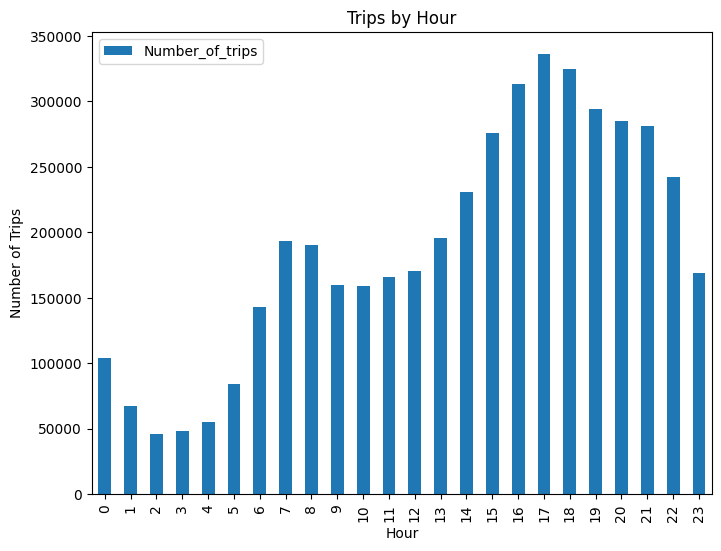

In [9]:
df_hour.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()